In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-dataset-cv/README.dataset.txt
/kaggle/input/brain-tumor-dataset-cv/README.roboflow.txt
/kaggle/input/brain-tumor-dataset-cv/data.yaml
/kaggle/input/brain-tumor-dataset-cv/valid/labels/volume_1_slice_48_jpg.rf.44235e70bacd356d0fc58ed80e8e54df.txt
/kaggle/input/brain-tumor-dataset-cv/valid/labels/volume_330_slice_44_jpg.rf.d5a21bf21e9e9177fc06538155433376.txt
/kaggle/input/brain-tumor-dataset-cv/valid/labels/volume_254_slice_98_jpg.rf.4343d3b6f6b5a56c514a958baa16418e.txt
/kaggle/input/brain-tumor-dataset-cv/valid/labels/volume_279_slice_97_jpg.rf.aa9be3c86d7edd917d45f3ad401bf189.txt
/kaggle/input/brain-tumor-dataset-cv/valid/labels/volume_107_slice_71_jpg.rf.137678c0996eb7150ec8936f46f48022.txt
/kaggle/input/brain-tumor-dataset-cv/valid/labels/volume_87_slice_91_jpg.rf.b49be97e770f39367dcd03cd429fd9c9.txt
/kaggle/input/brain-tumor-dataset-cv/valid/labels/volume_173_slice_96_jpg.rf.4861e431bc54f466148cbf196acb036e.txt
/kaggle/input/brain-tumor-dataset-cv/valid/la

In [4]:
!pip install ultralytics

In [5]:
from ultralytics import YOLO
print("OK loaded")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
OK loaded


In [8]:
model = YOLO("yolo11n.pt")

model.train(
    data="/kaggle/input/brain-tumor-dataset-cv/data.yaml",
    epochs=10,
    imgsz=640,
    batch=8,
    device=0,
)


Ultralytics 8.3.231 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/brain-tumor-dataset-cv/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspect

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       1980       4442      0.798      0.582       0.66      0.372
                label0       1268       1268      0.727      0.453      0.541      0.256
                label1       1963       1963      0.858      0.738        0.8      0.507
                label2       1211       1211       0.81      0.555      0.639      0.352
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to /kaggle/working/runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x799fdba9f010>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [9]:
results = model.predict(
    source="/kaggle/input/brain-tumor-dataset-cv/test/images",
    save=True,
    conf=0.25
)


image 1/990 /kaggle/input/brain-tumor-dataset-cv/test/images/volume_100_slice_105_jpg.rf.76d5a46d0268b812fb2d17702d2c68a2.jpg: 640x640 1 label1, 9.5ms
image 2/990 /kaggle/input/brain-tumor-dataset-cv/test/images/volume_100_slice_47_jpg.rf.1251a28a7dc734c97b852a8a7855d5ff.jpg: 640x640 1 label1, 8.7ms
image 3/990 /kaggle/input/brain-tumor-dataset-cv/test/images/volume_100_slice_48_jpg.rf.99cfad0e43aa2ff320e0e943d56d0d5d.jpg: 640x640 1 label1, 9.1ms
image 4/990 /kaggle/input/brain-tumor-dataset-cv/test/images/volume_100_slice_51_jpg.rf.fd8b915800706e464c3343da4e9fac05.jpg: 640x640 1 label0, 1 label1, 1 label2, 8.6ms
image 5/990 /kaggle/input/brain-tumor-dataset-cv/test/images/volume_101_slice_43_jpg.rf.0e109ebefc582671f100255115f194d5.jpg: 640x640 2 label1s, 8.5ms
image 6/990 /kaggle/input/brain-tumor-dataset-cv/test/images/volume_101_slice_68_jpg.rf.048615aca0086d0db8a13ef552ab5f30.jpg: 640x640 1 label1, 9.3ms
image 7/990 /kaggle/input/brain-tumor-dataset-cv/test/images/volume_102_slice

Loaded: /kaggle/input/brain-tumor-dataset-cv/test/images/volume_49_slice_106_jpg.rf.7f1dcb17843f80a8175c5dd85a977773.jpg


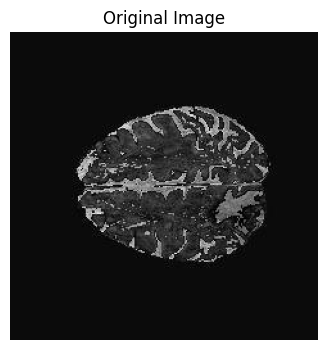

In [12]:
import cv2
import os
import matplotlib.pyplot as plt

IMG_DIR = "/kaggle/input/brain-tumor-dataset-cv/test/images/"

# Helper function to load grayscale image
def load_gray(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# Show function
def show(title, img):
    plt.figure(figsize=(4,4))
    plt.title(title)
    plt.axis("off")
    plt.imshow(img, cmap='gray')
    plt.show()

# Pick 1 sample image to demonstrate
sample_path = os.path.join(IMG_DIR, os.listdir(IMG_DIR)[0])
img = load_gray(sample_path)

print("Loaded:", sample_path)
show("Original Image", img)

In [25]:
import cv2
import numpy as np
import os
from ultralytics import YOLO

model = YOLO("yolo11n.pt")

pred_results = model.predict(
    source="/kaggle/input/brain-tumor-dataset-cv/test/images",
    save=True,
    conf=0.25
)

print("Starting CLAHE + GrabCut pipeline...")

output_dir = "/kaggle/working/processed_output"
os.makedirs(output_dir, exist_ok=True)

count = 0

for r in pred_results:
    img_path = r.path
    img = cv2.imread(img_path)

    if img is None:
        print("Could not read:", img_path)
        continue

    # if no detections in this image, skip
    if r.boxes is None or len(r.boxes) == 0:
        print("No YOLO bounding box found for:", img_path)
        continue

    # ------ Get YOLO bounding box ------
    box = r.boxes[0]  # take the first detection
    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)

    # ------ CLAHE ------
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray)
    enhanced = cv2.cvtColor(enhanced, cv2.COLOR_GRAY2BGR)

    # ------ GrabCut ------
    mask = np.zeros(img.shape[:2], np.uint8)

    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)

    rect = (x1, y1, x2 - x1, y2 - y1)
    cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype("uint8")
    segmented = img * mask2[:, :, np.newaxis]

    # ------ Save output ------
    save_path = os.path.join(output_dir, f"processed_{count}.png")
    cv2.imwrite(save_path, segmented)
    count += 1

print("Processing complete!")
print(f"{count} images processed and saved.")



image 1/990 /kaggle/input/brain-tumor-dataset-cv/test/images/volume_100_slice_105_jpg.rf.76d5a46d0268b812fb2d17702d2c68a2.jpg: 640x640 1 cake, 11.8ms
image 2/990 /kaggle/input/brain-tumor-dataset-cv/test/images/volume_100_slice_47_jpg.rf.1251a28a7dc734c97b852a8a7855d5ff.jpg: 640x640 (no detections), 8.2ms
image 3/990 /kaggle/input/brain-tumor-dataset-cv/test/images/volume_100_slice_48_jpg.rf.99cfad0e43aa2ff320e0e943d56d0d5d.jpg: 640x640 (no detections), 8.5ms
image 4/990 /kaggle/input/brain-tumor-dataset-cv/test/images/volume_100_slice_51_jpg.rf.fd8b915800706e464c3343da4e9fac05.jpg: 640x640 1 cake, 9.2ms
image 5/990 /kaggle/input/brain-tumor-dataset-cv/test/images/volume_101_slice_43_jpg.rf.0e109ebefc582671f100255115f194d5.jpg: 640x640 (no detections), 8.5ms
image 6/990 /kaggle/input/brain-tumor-dataset-cv/test/images/volume_101_slice_68_jpg.rf.048615aca0086d0db8a13ef552ab5f30.jpg: 640x640 1 cake, 8.5ms
image 7/990 /kaggle/input/brain-tumor-dataset-cv/test/images/volume_102_slice_119_

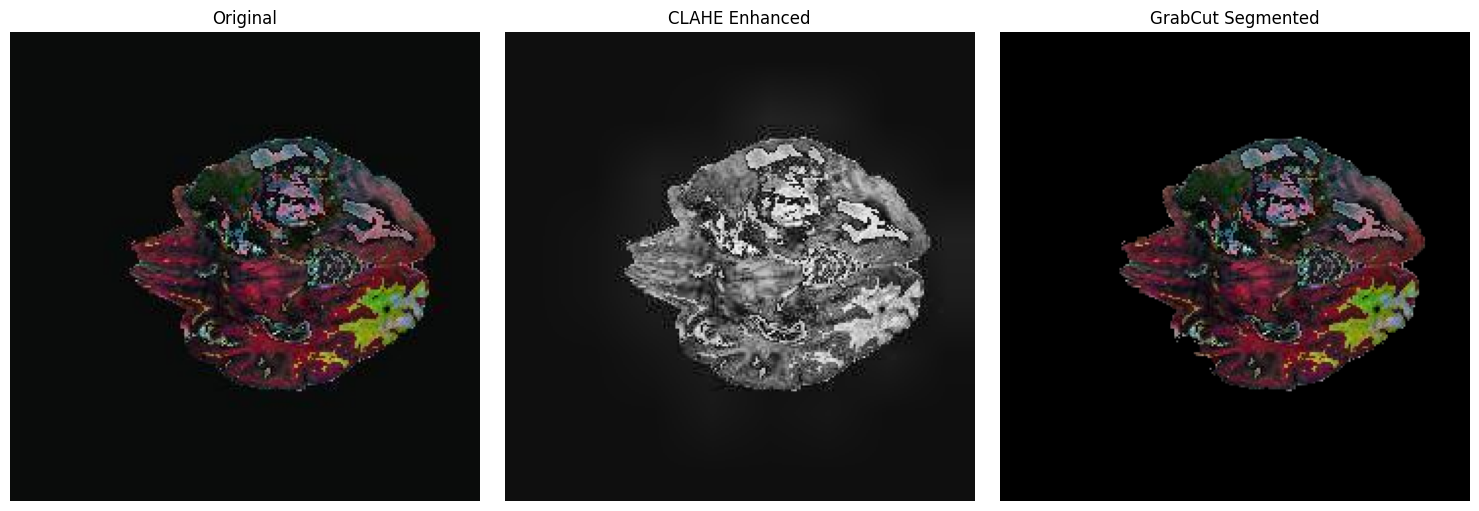

In [27]:
import matplotlib.pyplot as plt

# --- Show side-by-side results ---
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original")
ax[0].axis("off")

ax[1].imshow(cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB))
ax[1].set_title("CLAHE Enhanced")
ax[1].axis("off")

ax[2].imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
ax[2].set_title("GrabCut Segmented")
ax[2].axis("off")

plt.tight_layout()
plt.show()
